In [253]:
import IPython
import IPython.display 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [254]:
df = pd.read_csv('./CSI_Preprocessing/output/zero4_outputs.csv')
df = df.drop([df.columns[0]], axis='columns') 
df = df.iloc[:,:-3]
df.reset_index(drop=True, inplace=True)
# unit='s' to convert it into epoch time
df['Time'] = pd.to_datetime(df['Time'])
  
date_time = df['Time'].dt.strftime('%S')


# checking our dataframe once again
df.head()

,Time,Subcar_0,Subcar_1,Subcar_2,Subcar_3,Subcar_4,Subcar_5,Subcar_6,Subcar_7,Subcar_8,...,Subcar_52,Subcar_53,Subcar_54,Subcar_55,Subcar_56,Subcar_57,Subcar_58,Subcar_59,Subcar_60,Subcar_61
0,1970-01-01 00:00:01.641598541,5499.938181,7461.867126,6230.129694,8741.921642,297.127919,327.200244,362.527240,353.411941,351.432782,...,437.649403,412.093436,393.782935,396.807258,398.600050,399.450873,405.544079,402.951610,372.625818,343.914233
1,1970-01-01 00:00:01.641598542,5499.938181,7461.867126,6230.129694,8741.921642,350.910245,340.565706,338.013313,332.434956,327.232333,...,367.766230,339.484904,339.087009,343.083080,343.739727,346.943799,351.039884,350.000000,353.509547,361.763735
2,1970-01-01 00:00:01.641598543,5499.938181,7461.867126,6230.129694,8741.921642,357.572370,389.307077,421.911128,424.001179,447.754397,...,466.309983,418.119600,397.935924,387.985824,371.260017,354.983098,338.710791,315.483756,278.195974,245.790561
3,1970-01-01 00:00:01.641598544,5499.938181,7461.867126,6230.129694,8741.921642,507.385455,518.653063,533.348854,545.424605,542.492396,...,459.243944,413.706418,406.503383,392.998728,389.802514,381.072172,390.508643,384.002604,387.497097,393.782935
4,1970-01-01 00:00:01.641598545,5499.938181,7461.867126,6230.129694,8741.921642,379.117396,397.553770,415.226444,450.480854,445.583887,...,653.314626,626.906692,633.941638,639.366092,651.254942,668.481862,671.060355,670.391677,646.208945,616.507096


In [255]:
df['Time'] = pd.to_datetime(df['Time'], infer_datetime_format=True)

In [256]:
df[['Time','Subcar_6', 'Subcar_7','Subcar_9','Subcar_10', 'Subcar_11', 'Subcar_13' ]]

,Time,Subcar_6,Subcar_7,Subcar_9,Subcar_10,Subcar_11,Subcar_13
0,1970-01-01 00:00:01.641598541,362.527240,353.411941,353.793725,347.315419,349.905702,396.717784
1,1970-01-01 00:00:01.641598542,338.013313,332.434956,319.820262,315.317301,310.386855,328.671569
2,1970-01-01 00:00:01.641598543,421.911128,424.001179,441.279956,441.367194,461.677377,500.372861
3,1970-01-01 00:00:01.641598544,533.348854,545.424605,562.694411,538.674299,580.400724,644.920150
4,1970-01-01 00:00:01.641598545,415.226444,450.480854,458.423385,479.883319,511.391240,571.505031
...,...,...,...,...,...,...,...
3797,1970-01-01 00:00:01.641600114,369.043358,395.349213,424.067212,424.067212,418.001196,500.225949
3798,1970-01-01 00:00:01.641600114,362.663756,381.077420,404.853060,412.941885,438.744801,487.332535
3799,1970-01-01 00:00:01.641600114,366.771046,382.334932,423.207987,414.663719,422.454731,509.008841
3800,1970-01-01 00:00:01.641600114,274.614275,282.081548,320.923667,345.648666,368.110038,438.985193


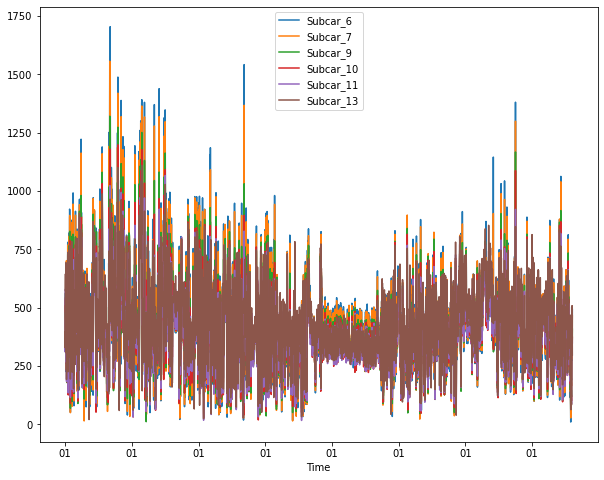

In [257]:
plot_cols = ['Subcar_6', 'Subcar_7','Subcar_9','Subcar_10', 'Subcar_11', 'Subcar_13']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=False)

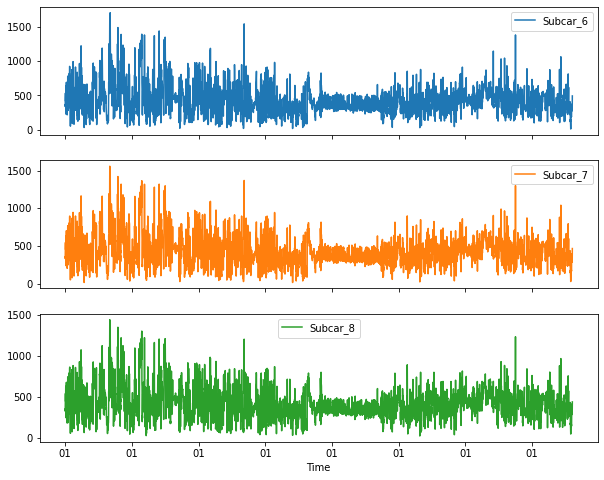

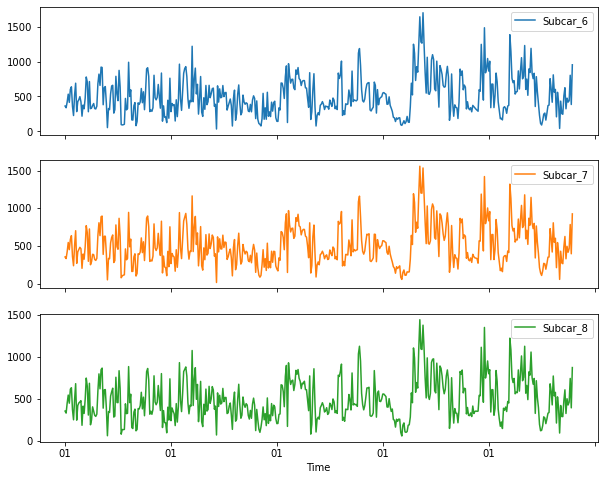

In [258]:
plot_cols = ['Subcar_6', 'Subcar_7', 'Subcar_8']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [259]:
df.count()

Time         3802
Subcar_0     3802
Subcar_1     3802
Subcar_2     3802
Subcar_3     3802
             ... 
Subcar_57    3802
Subcar_58    3802
Subcar_59    3802
Subcar_60    3802
Subcar_61    3802
Length: 62, dtype: int64

In [260]:
df = df.set_index('Time')

# Print the summary statistics of the DataFrame
print(df.describe())

          Subcar_0     Subcar_1     Subcar_2     Subcar_3     Subcar_4  \
count  3802.000000  3802.000000  3802.000000  3802.000000  3802.000000   
mean   5482.579092  7455.158794  6233.369403  8730.690589   437.319876   
std     308.541115   114.541341    63.095344   167.604655   494.960094   
min       0.000000  5499.938181  6230.129694  6230.129694     6.000000   
25%    5499.938181  7461.867126  6230.129694  8741.921642   277.672016   
50%    5499.938181  7461.867126  6230.129694  8741.921642   379.214319   
75%    5499.938181  7461.867126  6230.129694  8741.921642   502.360386   
max    5499.938181  7461.867126  7461.867126  8741.921642  8741.921642   

          Subcar_5     Subcar_6     Subcar_7     Subcar_8     Subcar_9  ...  \
count  3802.000000  3802.000000  3802.000000  3802.000000  3802.000000  ...   
mean    418.955691   422.932055   422.431979   413.767333   410.627681  ...   
std     208.937454   202.453002   193.543158   181.690717   171.775869  ...   
min       4.24264

In [261]:
features = df[['Subcar_6', 'Subcar_7','Subcar_9','Subcar_10', 'Subcar_11', 'Subcar_13']].to_numpy().tolist()
target= df['Subcar_6'].tolist()

In [262]:
features[0:14]

[[362.5272403558111,
  353.41194094144583,
  353.7937252128704,
  347.3154186038967,
  349.9057015825836,
  396.7177838211945],
 [338.0133133472704,
  332.4349560440358,
  319.82026202228025,
  315.3173005085512,
  310.3868553917836,
  328.6715685908959],
 [421.9111280826805,
  424.0011792436432,
  441.2799564902082,
  441.3671940686122,
  461.6773765304079,
  500.3728609746936],
 [533.348853940833,
  545.4246052388909,
  562.6944108483751,
  538.6742986258023,
  580.4007236384186,
  644.9201500961185],
 [415.22644424458326,
  450.4808541991546,
  458.42338509286367,
  479.8833191516454,
  511.3912396590305,
  571.5050305990316],
 [602.8440926143343,
  587.7490961286117,
  601.2395529237909,
  597.5014644333519,
  612.3152782676584,
  648.398797037749],
 [639.4255234192642,
  635.8246613650654,
  631.7087936699947,
  623.7731959614808,
  629.2217415188385,
  692.7885680350103],
 [359.3007097126305,
  360.1888393606887,
  373.2505860678587,
  373.8047618744309,
  365.9904370335378,
  41

In [263]:
target[0:14]

[362.5272403558111,
 338.0133133472704,
 421.9111280826805,
 533.348853940833,
 415.22644424458326,
 602.8440926143343,
 639.4255234192642,
 359.3007097126305,
 226.12607103118384,
 521.0239917700527,
 691.1128706658559,
 282.02836736753983,
 426.4985345813043,
 453.9273069556402]

In [264]:
# Single window
ts_generator = TimeseriesGenerator(features, target, length=6, sampling_rate=1, batch_size=1)

In [265]:
ts_generator[0]

(array([[[362.52724036, 353.41194094, 353.79372521, 347.3154186 ,
          349.90570158, 396.71778382],
         [338.01331335, 332.43495604, 319.82026202, 315.31730051,
          310.38685539, 328.67156859],
         [421.91112808, 424.00117924, 441.27995649, 441.36719407,
          461.67737653, 500.37286097],
         [533.34885394, 545.42460524, 562.69441085, 538.67429863,
          580.40072364, 644.9201501 ],
         [415.22644424, 450.4808542 , 458.42338509, 479.88331915,
          511.39123966, 571.5050306 ],
         [602.84409261, 587.74909613, 601.23955292, 597.50146443,
          612.31527827, 648.39879704]]]),
 array([639.42552342]))

In [266]:
ts_generator[0][0][0].shape

(6, 6)

In [267]:
ts_generator[1]

(array([[[338.01331335, 332.43495604, 319.82026202, 315.31730051,
          310.38685539, 328.67156859],
         [421.91112808, 424.00117924, 441.27995649, 441.36719407,
          461.67737653, 500.37286097],
         [533.34885394, 545.42460524, 562.69441085, 538.67429863,
          580.40072364, 644.9201501 ],
         [415.22644424, 450.4808542 , 458.42338509, 479.88331915,
          511.39123966, 571.5050306 ],
         [602.84409261, 587.74909613, 601.23955292, 597.50146443,
          612.31527827, 648.39879704],
         [639.42552342, 635.82466137, 631.70879367, 623.77319596,
          629.22174152, 692.78856804]]]),
 array([359.30070971]))

In [268]:
ts_generator[2]

(array([[[421.91112808, 424.00117924, 441.27995649, 441.36719407,
          461.67737653, 500.37286097],
         [533.34885394, 545.42460524, 562.69441085, 538.67429863,
          580.40072364, 644.9201501 ],
         [415.22644424, 450.4808542 , 458.42338509, 479.88331915,
          511.39123966, 571.5050306 ],
         [602.84409261, 587.74909613, 601.23955292, 597.50146443,
          612.31527827, 648.39879704],
         [639.42552342, 635.82466137, 631.70879367, 623.77319596,
          629.22174152, 692.78856804],
         [359.30070971, 360.18883936, 373.25058607, 373.80476187,
          365.99043703, 413.24084987]]]),
 array([226.12607103]))

In [269]:
len(ts_generator)

3796

In [270]:
# two windows
ts_generator_1 = TimeseriesGenerator(features, target, length=6, sampling_rate=1, batch_size=1, stride=2)

In [271]:
len(ts_generator_1)

1898

In [272]:
pd.concat([df['Subcar_6'], df['Subcar_6'].shift(-1), df['Subcar_6'].shift(-2)], axis=1)

,Subcar_6,Subcar_6,Subcar_6
Time,,,
1970-01-01 00:00:01.641598541,362.527240,338.013313,421.911128
1970-01-01 00:00:01.641598542,338.013313,421.911128,533.348854
1970-01-01 00:00:01.641598543,421.911128,533.348854,415.226444
1970-01-01 00:00:01.641598544,533.348854,415.226444,602.844093
1970-01-01 00:00:01.641598545,415.226444,602.844093,639.425523
...,...,...,...
1970-01-01 00:00:01.641600114,369.043358,362.663756,366.771046
1970-01-01 00:00:01.641600114,362.663756,366.771046,274.614275
1970-01-01 00:00:01.641600114,366.771046,274.614275,492.309862


In [273]:
multi_target = pd.concat([df['Subcar_6'], df['Subcar_6'].shift(-1), df['Subcar_6'].shift(-2)], axis=1).dropna().to_numpy().tolist()

In [274]:
multi_target[0:13]

[[362.5272403558111, 338.0133133472704, 421.9111280826805],
 [338.0133133472704, 421.9111280826805, 533.348853940833],
 [421.9111280826805, 533.348853940833, 415.22644424458326],
 [533.348853940833, 415.22644424458326, 602.8440926143343],
 [415.22644424458326, 602.8440926143343, 639.4255234192642],
 [602.8440926143343, 639.4255234192642, 359.3007097126305],
 [639.4255234192642, 359.3007097126305, 226.12607103118384],
 [359.3007097126305, 226.12607103118384, 521.0239917700527],
 [226.12607103118384, 521.0239917700527, 691.1128706658559],
 [521.0239917700527, 691.1128706658559, 282.02836736753983],
 [691.1128706658559, 282.02836736753983, 426.4985345813043],
 [282.02836736753983, 426.4985345813043, 453.9273069556402],
 [426.4985345813043, 453.9273069556402, 497.43441778791305]]

In [275]:
# Hopping window
ts_generator_2 = TimeseriesGenerator(features[:-2], multi_target, length=6, sampling_rate=1, batch_size=1, stride=6)

In [276]:
len(ts_generator_2)

633

In [277]:
ts_generator_2[0]

(array([[[362.52724036, 353.41194094, 353.79372521, 347.3154186 ,
          349.90570158, 396.71778382],
         [338.01331335, 332.43495604, 319.82026202, 315.31730051,
          310.38685539, 328.67156859],
         [421.91112808, 424.00117924, 441.27995649, 441.36719407,
          461.67737653, 500.37286097],
         [533.34885394, 545.42460524, 562.69441085, 538.67429863,
          580.40072364, 644.9201501 ],
         [415.22644424, 450.4808542 , 458.42338509, 479.88331915,
          511.39123966, 571.5050306 ],
         [602.84409261, 587.74909613, 601.23955292, 597.50146443,
          612.31527827, 648.39879704]]]),
 array([[639.42552342, 359.30070971, 226.12607103]]))

In [278]:
ts_generator_2[1]


(array([[[639.42552342, 635.82466137, 631.70879367, 623.77319596,
          629.22174152, 692.78856804],
         [359.30070971, 360.18883936, 373.25058607, 373.80476187,
          365.99043703, 413.24084987],
         [226.12607103, 237.11811403, 262.20793276, 263.91096984,
          267.91789787, 307.156312  ],
         [521.02399177, 507.60713155, 473.00105708, 463.49217901,
          439.76925768, 471.44458847],
         [691.11287067, 701.48556649, 677.78462656, 655.33197694,
          646.69389977, 689.84418531],
         [282.02836737, 268.51629373, 233.11799587, 229.61271742,
          184.2009772 , 192.62658176]]]),
 array([[426.49853458, 453.92730696, 497.43441779]]))

In [279]:
df_input = df[['Subcar_6', 'Subcar_7','Subcar_9','Subcar_10', 'Subcar_11', 'Subcar_13']]
df_input

,Subcar_6,Subcar_7,Subcar_9,Subcar_10,Subcar_11,Subcar_13
Time,,,,,,
1970-01-01 00:00:01.641598541,362.527240,353.411941,353.793725,347.315419,349.905702,396.717784
1970-01-01 00:00:01.641598542,338.013313,332.434956,319.820262,315.317301,310.386855,328.671569
1970-01-01 00:00:01.641598543,421.911128,424.001179,441.279956,441.367194,461.677377,500.372861
1970-01-01 00:00:01.641598544,533.348854,545.424605,562.694411,538.674299,580.400724,644.920150
1970-01-01 00:00:01.641598545,415.226444,450.480854,458.423385,479.883319,511.391240,571.505031
...,...,...,...,...,...,...
1970-01-01 00:00:01.641600114,369.043358,395.349213,424.067212,424.067212,418.001196,500.225949
1970-01-01 00:00:01.641600114,362.663756,381.077420,404.853060,412.941885,438.744801,487.332535
1970-01-01 00:00:01.641600114,366.771046,382.334932,423.207987,414.663719,422.454731,509.008841


In [280]:
df_input.describe()

,Subcar_6,Subcar_7,Subcar_9,Subcar_10,Subcar_11,Subcar_13
count,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000
mean,422.932055,422.431979,410.627681,403.013887,401.351757,432.789300
std,202.453002,193.543158,171.775869,160.406865,152.042491,151.963799
min,10.295630,14.764823,11.661904,19.235384,17.029386,21.023796
25%,295.032201,300.879956,301.906856,299.537560,302.426850,330.353976
50%,391.523942,393.309005,387.431284,381.450521,381.629371,416.394643
75%,511.462363,509.395703,496.494461,487.182967,486.122154,525.755407
max,1704.556541,1556.767484,1320.984860,1198.269586,1101.918781,1110.358951


In [281]:
df_input.query("Subcar_6 > 511")

,Subcar_6,Subcar_7,Subcar_9,Subcar_10,Subcar_11,Subcar_13
Time,,,,,,
1970-01-01 00:00:01.641598544,533.348854,545.424605,562.694411,538.674299,580.400724,644.920150
1970-01-01 00:00:01.641598546,602.844093,587.749096,601.239553,597.501464,612.315278,648.398797
1970-01-01 00:00:01.641598546,639.425523,635.824661,631.708794,623.773196,629.221742,692.788568
1970-01-01 00:00:01.641598549,521.023992,507.607132,473.001057,463.492179,439.769258,471.444588
1970-01-01 00:00:01.641598549,691.112871,701.485566,677.784627,655.331977,646.693900,689.844185
...,...,...,...,...,...,...
1970-01-01 00:00:01.641600103,615.646814,626.744765,609.118215,588.809816,588.217647,609.899992
1970-01-01 00:00:01.641600103,690.676480,678.564662,656.966514,620.133050,616.235345,648.617761
1970-01-01 00:00:01.641600104,521.008637,531.681296,533.258849,523.495941,529.429882,552.109591


In [282]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)
data_scaled

array([[0.20789691, 0.21961513, 0.26130438, 0.27826168, 0.30682973,
        0.34488374],
       [0.19342811, 0.2060114 , 0.23535703, 0.25112242, 0.27040311,
        0.28241792],
       [0.24294694, 0.26539277, 0.32812229, 0.35803186, 0.4098556 ,
        0.44003819],
       ...,
       [0.21040172, 0.2383719 , 0.31431976, 0.33538326, 0.37370201,
        0.44796594],
       [0.15600823, 0.17335685, 0.23619976, 0.27684802, 0.32360963,
        0.38368485],
       [0.28449823, 0.29206099, 0.30271959, 0.30005974, 0.3069601 ,
        0.25445416]])

In [283]:
features = data_scaled
target = data_scaled[:, 0]

In [284]:
TimeseriesGenerator(features, target, length=6, sampling_rate=1, batch_size=1)[0]

(array([[[0.20789691, 0.21961513, 0.26130438, 0.27826168, 0.30682973,
          0.34488374],
         [0.19342811, 0.2060114 , 0.23535703, 0.25112242, 0.27040311,
          0.28241792],
         [0.24294694, 0.26539277, 0.32812229, 0.35803186, 0.4098556 ,
          0.44003819],
         [0.30872059, 0.34413675, 0.42085301, 0.44056306, 0.51928919,
          0.57273131],
         [0.23900145, 0.28256503, 0.34121565, 0.39069938, 0.4556795 ,
          0.50533689],
         [0.34973861, 0.37158449, 0.450292  , 0.49045743, 0.54870653,
          0.57592468]]]),
 array([[0.37132999, 0.40276185, 0.47356299, 0.51273984, 0.56429011,
         0.6166741 ]]))

In [285]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=120, shuffle= False)
print('X_train.shape: ', x_train.shape)
print('X_test.shape: ', x_test.shape)

X_train.shape:  (3041, 6)
X_test.shape:  (761, 6)


In [286]:
win_length = 144 # 1 day = 144 of data, 5 day = 720 of data
batch_size = 32
num_features = 6 
train_generator =  tf.keras.preprocessing.sequence.TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator =  tf.keras.preprocessing.sequence.TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [287]:
train_generator[0]

(array([[[2.07896911e-01, 2.19615132e-01, 2.61304379e-01, 2.78261677e-01,
          3.06829726e-01, 3.44883745e-01],
         [1.93428108e-01, 2.06011404e-01, 2.35357027e-01, 2.51122415e-01,
          2.70403112e-01, 2.82417924e-01],
         [2.42946937e-01, 2.65392769e-01, 3.28122295e-01, 3.58031862e-01,
          4.09855597e-01, 4.40038185e-01],
         ...,
         [2.05591322e-01, 2.26909656e-01, 2.78355891e-01, 3.02533031e-01,
          3.39785596e-01, 3.81576669e-01],
         [2.22800783e-01, 2.46910161e-01, 3.17926143e-01, 3.67689429e-01,
          3.93654833e-01, 4.59108488e-01],
         [1.29300358e-02, 6.56585683e-05, 7.41774868e-02, 1.09615313e-01,
          1.46093732e-01, 2.28636131e-01]],
 
        [[1.93428108e-01, 2.06011404e-01, 2.35357027e-01, 2.51122415e-01,
          2.70403112e-01, 2.82417924e-01],
         [2.42946937e-01, 2.65392769e-01, 3.28122295e-01, 3.58031862e-01,
          4.09855597e-01, 4.40038185e-01],
         [3.08720588e-01, 3.44136749e-01, 4.208

In [330]:
model = tf.keras.Sequential()

model.add(
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True), input_shape=(win_length, num_features))
)
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 144, 256)          138240    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 302,721
Trainable params: 302,721
Non-trainable params: 0
_________________________________________________________________


In [331]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    mode='min'
)
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer= tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanAbsoluteError()] )


In [332]:

history = model.fit_generator(
    train_generator, epochs=50,
    validation_data=test_generator,
    shuffle=False,
    callbacks=[early_stopping
    ])

Epoch 1/50
91/91 [==============================] - 16s 175ms/step - loss: 0.0202 - mean_absolute_error: 0.1062 - val_loss: 0.0144 - val_mean_absolute_error: 0.0954
Epoch 2/50
91/91 [==============================] - 15s 169ms/step - loss: 0.0159 - mean_absolute_error: 0.0960 - val_loss: 0.0151 - val_mean_absolute_error: 0.0985
Epoch 3/50
91/91 [==============================] - 15s 169ms/step - loss: 0.0157 - mean_absolute_error: 0.0953 - val_loss: 0.0152 - val_mean_absolute_error: 0.0989


In [333]:
model.evaluate_generator(
    test_generator, verbose=0
)

[0.015151784755289555, 0.09889734536409378]

In [334]:
predictions = model.predict_generator(test_generator)

In [335]:
predictions.shape[0]

617

In [336]:
predictions

array([[0.4138572 ],
       [0.42963678],
       [0.45297146],
       [0.46017396],
       [0.47187194],
       [0.4476698 ],
       [0.42471632],
       [0.42039844],
       [0.43261853],
       [0.4366403 ],
       [0.42784092],
       [0.4357545 ],
       [0.44353086],
       [0.4213251 ],
       [0.39307517],
       [0.38184264],
       [0.3823168 ],
       [0.40177253],
       [0.4171398 ],
       [0.4053822 ],
       [0.40842903],
       [0.39742312],
       [0.3881081 ],
       [0.36936536],
       [0.36093232],
       [0.40828687],
       [0.37671915],
       [0.3638766 ],
       [0.3511268 ],
       [0.35722452],
       [0.35986307],
       [0.36256102],
       [0.36674294],
       [0.3744006 ],
       [0.380635  ],
       [0.38685146],
       [0.3757579 ],
       [0.36848965],
       [0.37623727],
       [0.369724  ],
       [0.3752615 ],
       [0.37773916],
       [0.37945464],
       [0.3756158 ],
       [0.3765108 ],
       [0.36170968],
       [0.38161397],
       [0.409

In [337]:
y_test

array([[0.2168591 , 0.24203571, 0.29244596, 0.3134606 , 0.34584301,
        0.37194661],
       [0.27466951, 0.30083508, 0.35198348, 0.37667641, 0.4106156 ,
        0.4547261 ],
       [0.27995243, 0.31481666, 0.36175921, 0.38586061, 0.4290162 ,
        0.46590012],
       ...,
       [0.21040172, 0.2383719 , 0.31431976, 0.33538326, 0.37370201,
        0.44796594],
       [0.15600823, 0.17335685, 0.23619976, 0.27684802, 0.32360963,
        0.38368485],
       [0.28449823, 0.29206099, 0.30271959, 0.30005974, 0.3069601 ,
        0.25445416]])

In [338]:
x_test

array([[0.2168591 , 0.24203571, 0.29244596, 0.3134606 , 0.34584301,
        0.37194661],
       [0.27466951, 0.30083508, 0.35198348, 0.37667641, 0.4106156 ,
        0.4547261 ],
       [0.27995243, 0.31481666, 0.36175921, 0.38586061, 0.4290162 ,
        0.46590012],
       ...,
       [0.21040172, 0.2383719 , 0.31431976, 0.33538326, 0.37370201,
        0.44796594],
       [0.15600823, 0.17335685, 0.23619976, 0.27684802, 0.32360963,
        0.38368485],
       [0.28449823, 0.29206099, 0.30271959, 0.30005974, 0.3069601 ,
        0.25445416]])

In [339]:
x_test[:,1:][win_length:]

array([[0.39290612, 0.46520267, 0.49814461, 0.55270415, 0.59557968],
       [0.42747553, 0.52068892, 0.60819308, 0.62967567, 0.69314958],
       [0.42183486, 0.4937544 , 0.5346585 , 0.59670373, 0.64574991],
       ...,
       [0.2383719 , 0.31431976, 0.33538326, 0.37370201, 0.44796594],
       [0.17335685, 0.23619976, 0.27684802, 0.32360963, 0.38368485],
       [0.29206099, 0.30271959, 0.30005974, 0.3069601 , 0.25445416]])

In [340]:
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])], axis=1)
df_pred

,0,0,1,2,3,4
0,0.413857,0.392906,0.465203,0.498145,0.552704,0.595580
1,0.429637,0.427476,0.520689,0.608193,0.629676,0.693150
2,0.452971,0.421835,0.493754,0.534658,0.596704,0.645750
3,0.460174,0.443589,0.516005,0.564733,0.613395,0.674740
4,0.471872,0.338828,0.391878,0.416187,0.471090,0.508363
...,...,...,...,...,...,...
612,0.252082,0.246812,0.314976,0.343359,0.369597,0.439903
613,0.286059,0.237556,0.300301,0.333923,0.388717,0.428067
614,0.306204,0.238372,0.314320,0.335383,0.373702,0.447966
615,0.317672,0.173357,0.236200,0.276848,0.323610,0.383685


In [341]:
# To the original format
rev_trans = scaler.inverse_transform(df_pred)

In [342]:
rev_trans

array([[711.47769271, 620.62710221, 620.76243443, 606.56491821,
        616.65225208, 669.80967446],
       [738.21242616, 673.93323111, 693.41185453, 736.31582898,
        700.15783935, 776.09599922],
       [777.74746571, 665.23529672, 658.14588049, 649.61604044,
        664.38693545, 724.46186925],
       ...,
       [529.08578991, 382.3349317 , 423.20798669, 414.66371917,
        422.4547313 , 509.00884079],
       [548.51460324, 282.08154849, 320.92366694, 345.64866556,
        368.1100379 , 438.98519337],
       [535.42169073, 465.12363948, 408.01960737, 373.01608544,
        350.04713968, 298.20965779]])

In [343]:
# From bottom to top 
df_final = df_input[predictions.shape[0]*-1:]

In [344]:
df_final.count()

Subcar_6     617
Subcar_7     617
Subcar_9     617
Subcar_10    617
Subcar_11    617
Subcar_13    617
dtype: int64

In [345]:
df_final['Subcar_6_pred'] = rev_trans[:, 0]
df_final

C:\Users\Owner\anaconda3\envs\Tensorflow210\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Subcar_6,Subcar_7,Subcar_9,Subcar_10,Subcar_11,Subcar_13,Subcar_6_pred
Time,,,,,,,
1970-01-01 00:00:01.641599861,685.947064,620.627102,620.762434,606.564918,616.652252,669.809674,711.477693
1970-01-01 00:00:01.641599861,687.058766,673.933231,693.411855,736.315829,700.157839,776.095999,738.212426
1970-01-01 00:00:01.641599861,695.568488,665.235297,658.145880,649.616040,664.386935,724.461869,777.747466
1970-01-01 00:00:01.641599861,707.552121,698.779651,687.278692,685.075178,682.495421,756.042327,789.950390
1970-01-01 00:00:01.641599861,721.632524,537.239239,524.756134,509.934309,528.109837,574.801705,809.769817
...,...,...,...,...,...,...,...
1970-01-01 00:00:01.641600114,428.318251,395.349213,424.067212,424.067212,418.001196,500.225949,437.387888
1970-01-01 00:00:01.641600114,448.049769,381.077420,404.853060,412.941885,438.744801,487.332535,494.954199
1970-01-01 00:00:01.641600114,474.587378,382.334932,423.207987,414.663719,422.454731,509.008841,529.085790


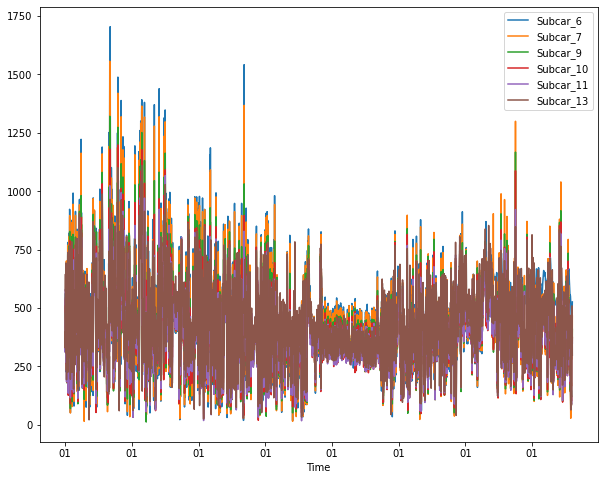

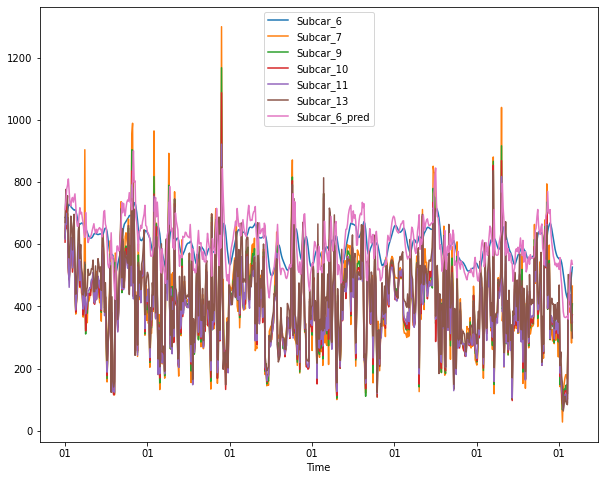

In [346]:
plot_cols = ['Subcar_6', 'Subcar_7','Subcar_9','Subcar_10', 'Subcar_11', 'Subcar_13']
plot_features = df_input[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=False)

df_final[['Subcar_6', 'Subcar_6_pred']]
df_final.index = date_time[:617]
_ = df_final.plot(subplots=False)